In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_excel('dane.xlsx', sheet_name='md_marka_nadwozie')
df2 = pd.read_excel('dane.xlsx', sheet_name='md_nadwozie_sl')
df3 = pd.read_excel('dane.xlsx', sheet_name='md_pojemnosc')
df4 = pd.read_excel('dane.xlsx', sheet_name='md_ceny')

In [4]:
df = pd.merge(df1, df2, on='NADW')
df = pd.merge(df, df3, on='MODEL_ID')
df = pd.merge(df, df4, on='MODEL_ID')
df

,MODEL_ID,NADW,MARKA,NADWOZIE,POJEMNOSC,ROK_MIES,CENA
0,188680,sed,SAAB,sedan,2060,2012,-107772
1,188680,sed,SAAB,sedan,2060,2011,-95742
2,188680,sed,SAAB,sedan,2060,2010,86100
3,188680,sed,SAAB,sedan,2060,2009,77400
4,188680,sed,SAAB,sedan,2060,2008,69600
...,...,...,...,...,...,...,...
15901,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2004,273900
15902,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2003,254700
15903,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2002,237000
15904,134494,tg,PORSCHE,targa (dach twardy demontowany),3750,2001,220200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15906 entries, 0 to 15905
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MODEL_ID   15906 non-null  int64 
 1   NADW       15906 non-null  object
 2   MARKA      15906 non-null  object
 3   NADWOZIE   15906 non-null  object
 4   POJEMNOSC  15906 non-null  int64 
 5   ROK_MIES   15906 non-null  int64 
 6   CENA       15906 non-null  object
dtypes: int64(3), object(4)
memory usage: 994.1+ KB


In [6]:
df['CENA'] = pd.to_numeric(df['CENA'], errors='coerce')

In [7]:
df.isna().sum()

MODEL_ID     0
NADW         0
MARKA        0
NADWOZIE     0
POJEMNOSC    0
ROK_MIES     0
CENA         4
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df = df.loc[df['CENA'] != 0]

In [10]:
df['CENA'] = df['CENA'].apply(abs)

C:\Users\nazwa\AppData\Local\Temp\ipykernel_15320\3723117373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CENA'] = df['CENA'].apply(abs)


In [56]:
df.loc[df['NADWOZIE'] == 'targa (dach twardy demontowany)', 'NADWOZIE'] = 'targa'
df.loc[df['ROK_MIES'] >= 2015, 'ROK_MIES'] = 2015

In [57]:
df

,MODEL_ID,NADW,MARKA,NADWOZIE,POJEMNOSC,ROK_MIES,CENA
0,188680,sed,SAAB,sedan,2060,2012,107772.0
1,188680,sed,SAAB,sedan,2060,2011,95742.0
2,188680,sed,SAAB,sedan,2060,2010,86100.0
3,188680,sed,SAAB,sedan,2060,2009,77400.0
4,188680,sed,SAAB,sedan,2060,2008,69600.0
...,...,...,...,...,...,...,...
15901,134494,tg,PORSCHE,targa,3750,2004,273900.0
15902,134494,tg,PORSCHE,targa,3750,2003,254700.0
15903,134494,tg,PORSCHE,targa,3750,2002,237000.0
15904,134494,tg,PORSCHE,targa,3750,2001,220200.0


In [58]:
df.duplicated().sum()

11

In [59]:
df.nunique()

MODEL_ID     2306
NADW           11
MARKA          51
NADWOZIE       11
POJEMNOSC     251
ROK_MIES       18
CENA         6598
dtype: int64

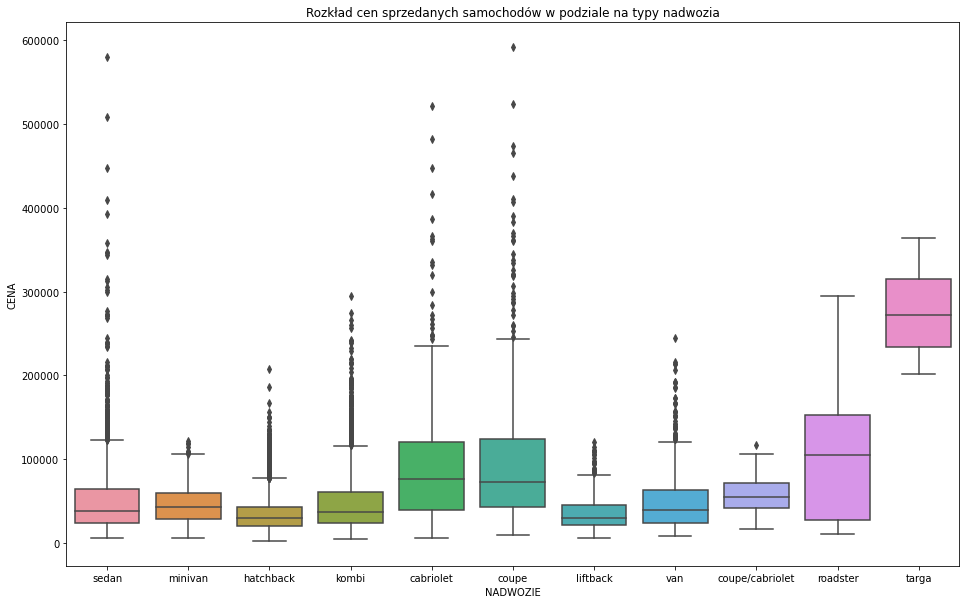

In [60]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='NADWOZIE', y='CENA')
plt.title('Rozkład cen sprzedanych samochodów w podziale na typy nadwozia')
plt.show()

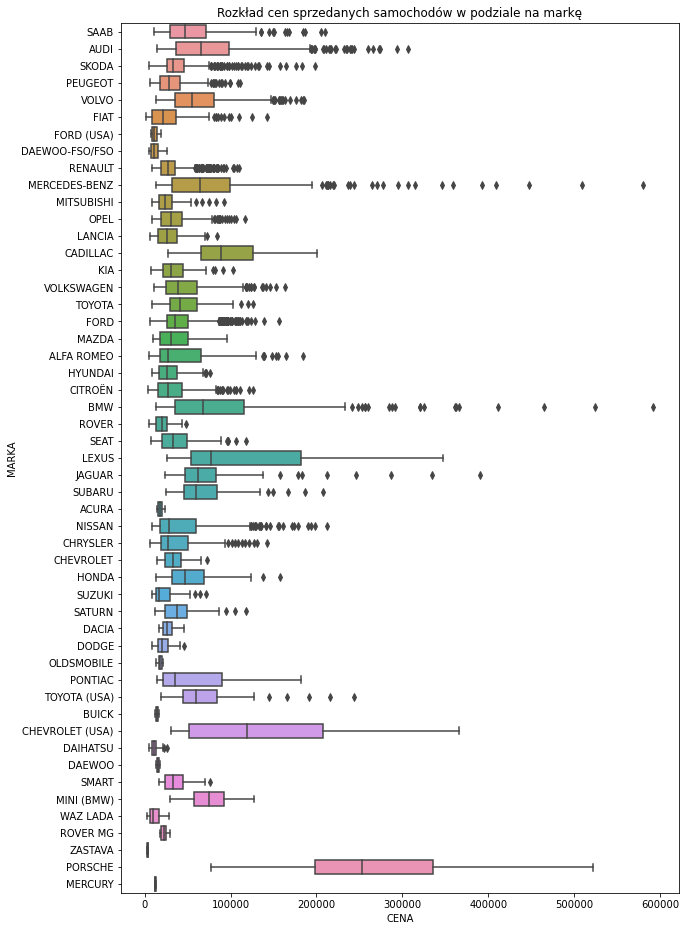

In [61]:
plt.figure(figsize=(10,16))
sns.boxplot(data=df, y='MARKA', x='CENA')
plt.title('Rozkład cen sprzedanych samochodów w podziale na markę')
plt.show()

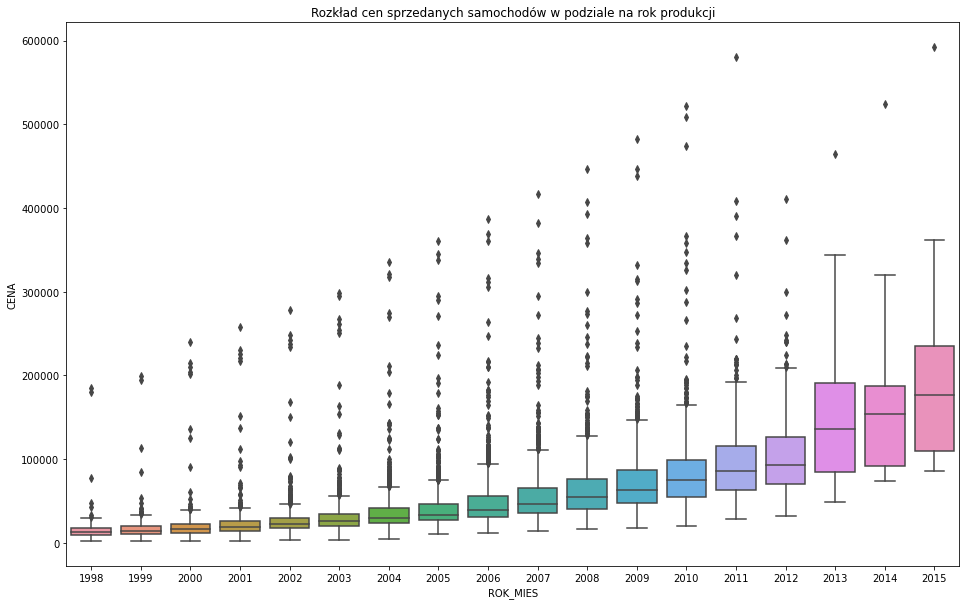

In [62]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='ROK_MIES', y='CENA')
plt.title('Rozkład cen sprzedanych samochodów w podziale na rok produkcji')
plt.show()

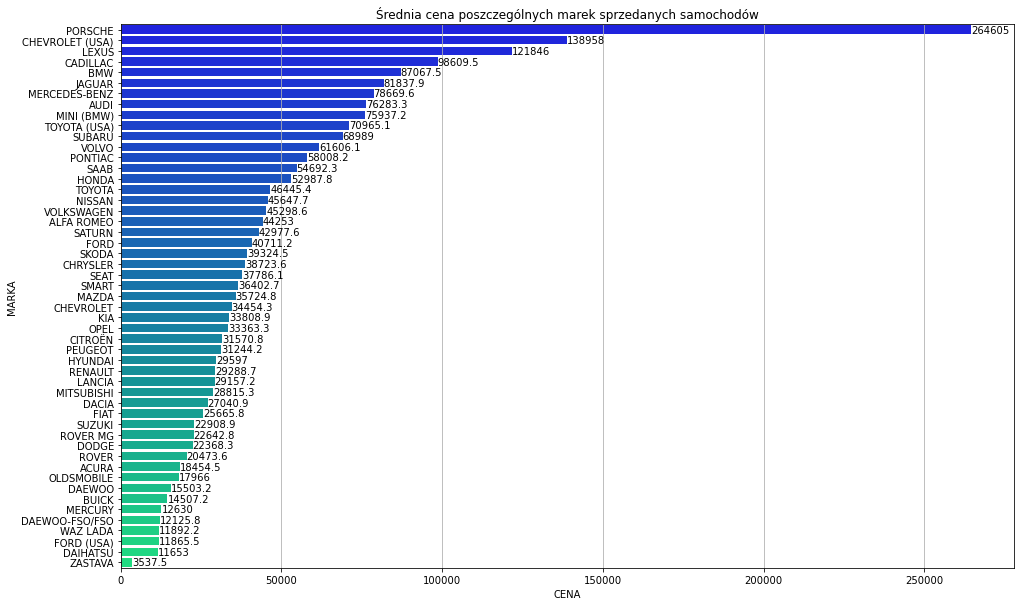

In [63]:
df_cena_marka = df.groupby('MARKA').mean()['CENA'].reset_index().sort_values('CENA', ascending=False)


plt.figure(figsize=(16,10))
ax = sns.barplot(x='CENA', y='MARKA', data=df_cena_marka, palette='winter')
plt.grid(axis='x')
plt.title('Średnia cena poszczególnych marek sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

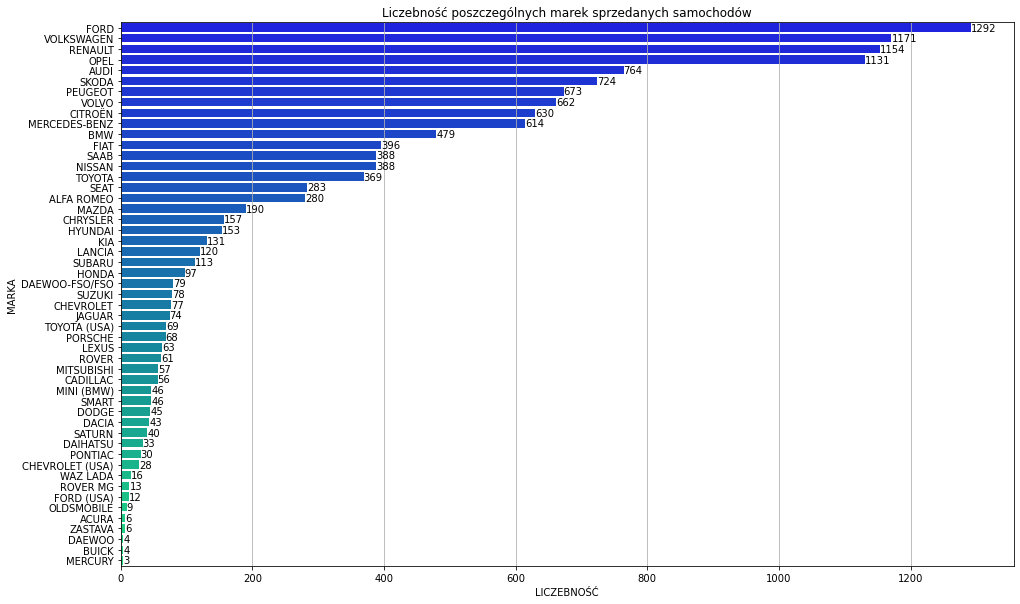

In [64]:
df_count_marka = df.groupby('MARKA').count()['MODEL_ID'].reset_index().sort_values('MODEL_ID', ascending=False)
df_count_marka.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)

plt.figure(figsize=(16,10))
ax = sns.barplot(x='LICZEBNOŚĆ', y='MARKA', data=df_count_marka, palette='winter')
plt.grid(axis='x')
plt.title('Liczebność poszczególnych marek sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

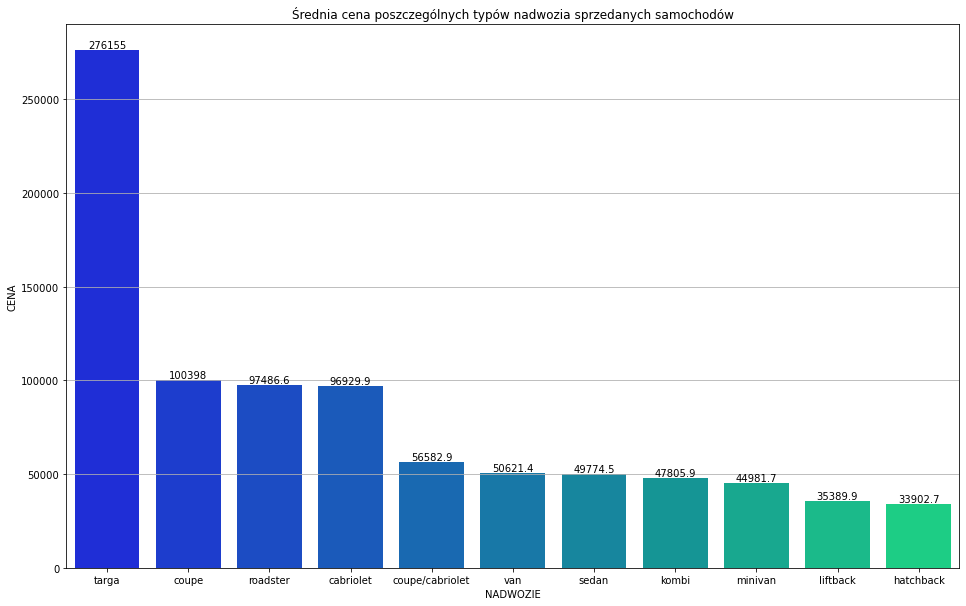

In [65]:
df_cena_nadwozie = df.groupby('NADWOZIE').mean()['CENA'].reset_index().sort_values('CENA', ascending=False)


plt.figure(figsize=(16,10))
ax = sns.barplot(y='CENA', x='NADWOZIE', data=df_cena_nadwozie, palette='winter')
plt.grid(axis='y')
plt.title('Średnia cena poszczególnych typów nadwozia sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

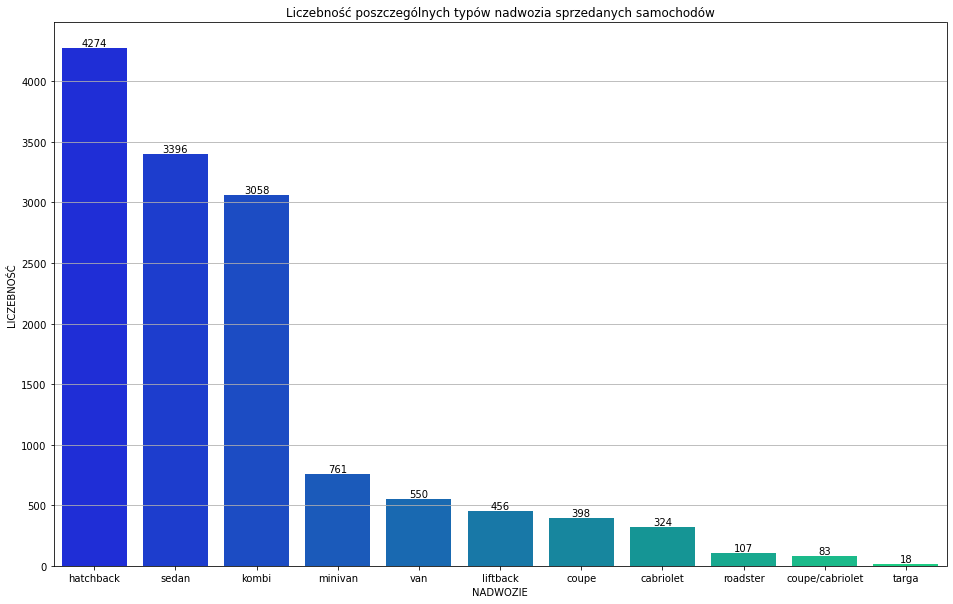

In [66]:
df_count_nadwozie = df.groupby('NADWOZIE').count()['MODEL_ID'].reset_index().sort_values('MODEL_ID', ascending=False)
df_count_nadwozie.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)

plt.figure(figsize=(16,10))
ax = sns.barplot(y='LICZEBNOŚĆ', x='NADWOZIE', data=df_count_nadwozie, palette='winter')
plt.grid(axis='y')
plt.title('Liczebność poszczególnych typów nadwozia sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

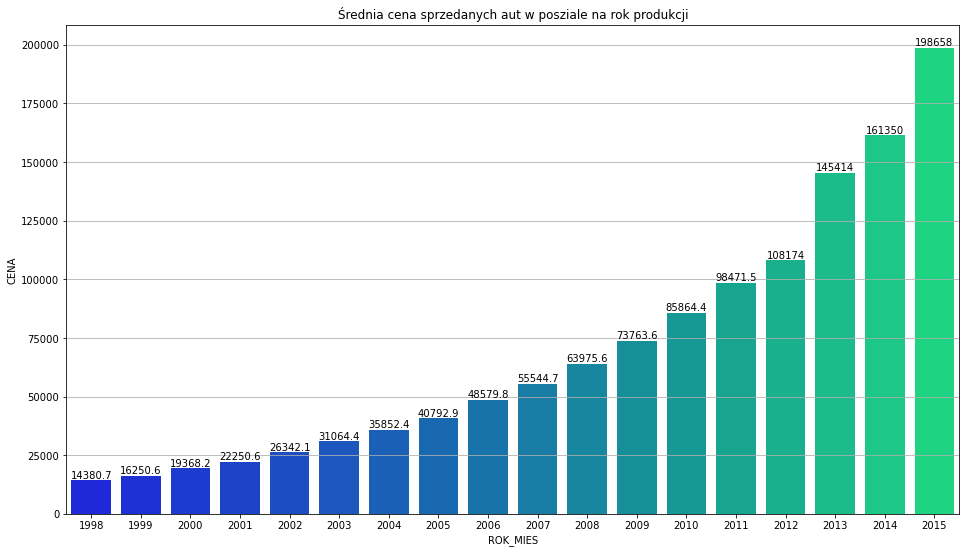

In [67]:
df_cena_rok = df.groupby('ROK_MIES').mean()['CENA'].reset_index()


plt.figure(figsize=(16,9))
ax = sns.barplot(x='ROK_MIES', y='CENA', data=df_cena_rok, palette='winter')
plt.grid(axis='y')
plt.title('Średnia cena sprzedanych aut w posziale na rok produkcji')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

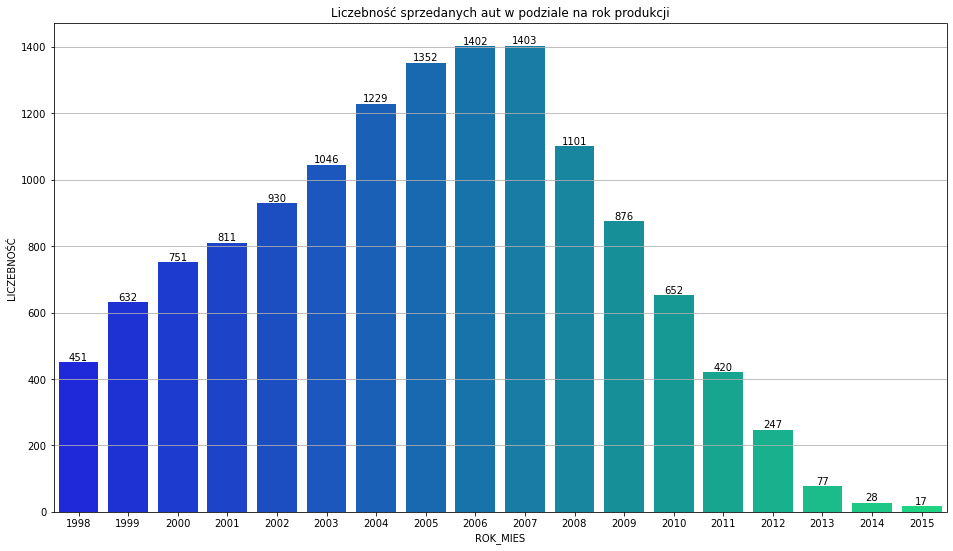

In [68]:
df_count_rok = df.groupby('ROK_MIES').count()['MODEL_ID'].reset_index()
df_count_rok.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)

plt.figure(figsize=(16,9))
ax = sns.barplot(x='ROK_MIES', y='LICZEBNOŚĆ', data=df_count_rok, palette='winter')
plt.grid(axis='y')
plt.title('Liczebność sprzedanych aut w podziale na rok produkcji')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

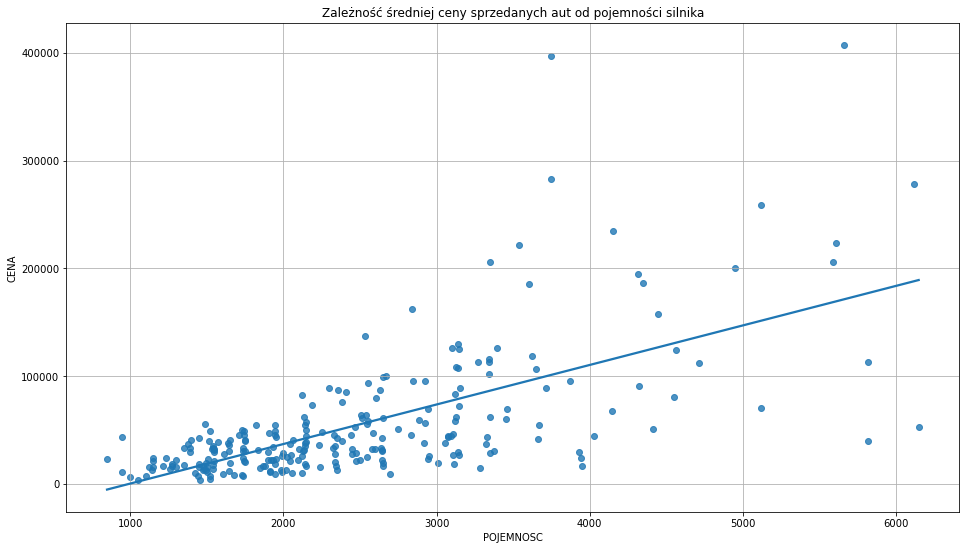

In [73]:
df_cena_pojemnosc = df.groupby('POJEMNOSC').mean()['CENA'].reset_index()


plt.figure(figsize=(16,9))
ax = sns.regplot(x='POJEMNOSC', y='CENA', data=df_cena_pojemnosc, ci=None)
plt.grid()
plt.title('Zależność średniej ceny sprzedanych aut od pojemności silnika')
plt.show()

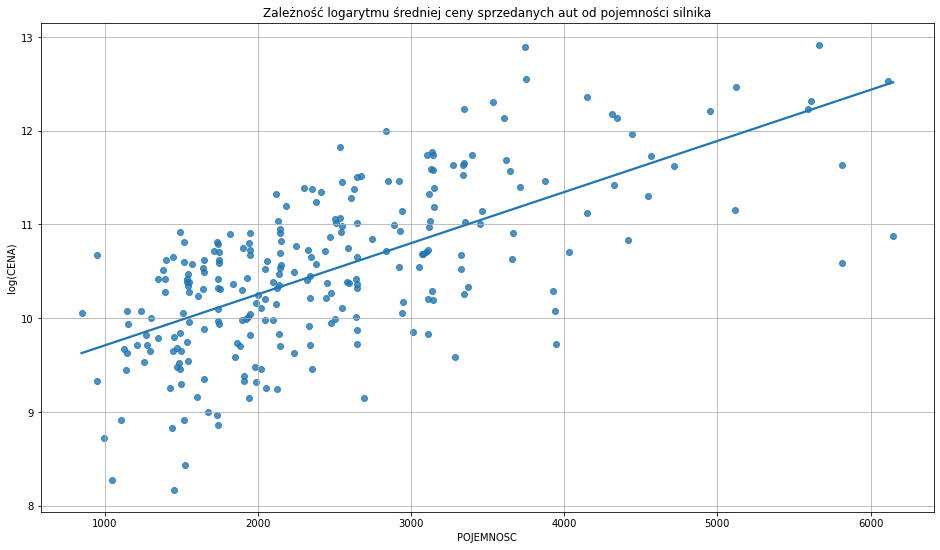

In [82]:
df_cena_pojemnosc = df.groupby('POJEMNOSC').mean()['CENA'].reset_index()
df_cena_pojemnosc['log(CENA)'] = df_cena_pojemnosc['CENA'].apply(np.log)


plt.figure(figsize=(16,9))
ax = sns.regplot(x='POJEMNOSC', y='log(CENA)', data=df_cena_pojemnosc, ci=None)
plt.grid()
plt.title('Zależność logarytmu średniej ceny sprzedanych aut od pojemności silnika')
plt.show()

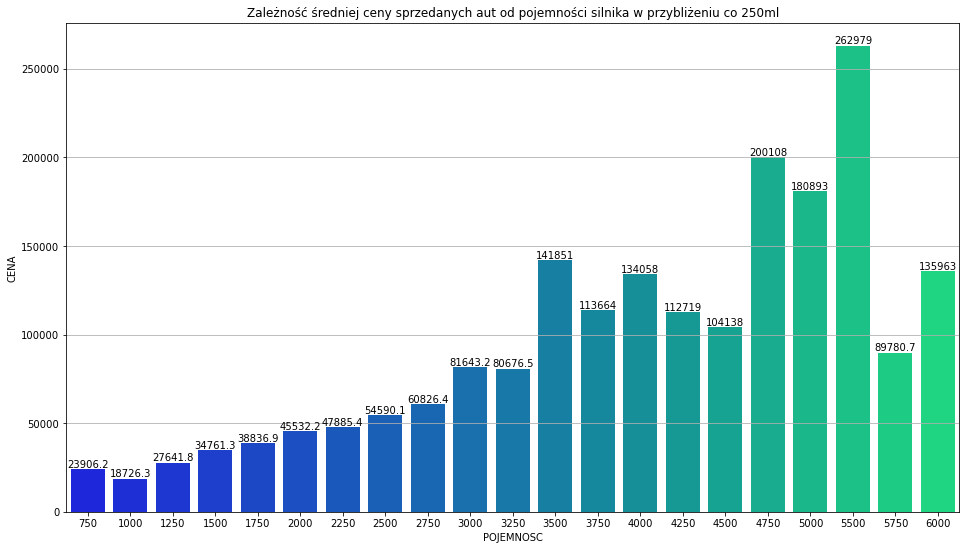

In [83]:
df_pom = df.copy()
df_pom['POJEMNOSC'] = (df_pom['POJEMNOSC'] // 250) * 250

df_cena_pojemnosc = df_pom.groupby('POJEMNOSC').mean()['CENA'].reset_index()


plt.figure(figsize=(16,9))
ax = sns.barplot(x='POJEMNOSC', y='CENA', data=df_cena_pojemnosc, palette='winter')
plt.grid(axis='y')
plt.title('Zależność średniej ceny sprzedanych aut od pojemności silnika w przybliżeniu co 250ml')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

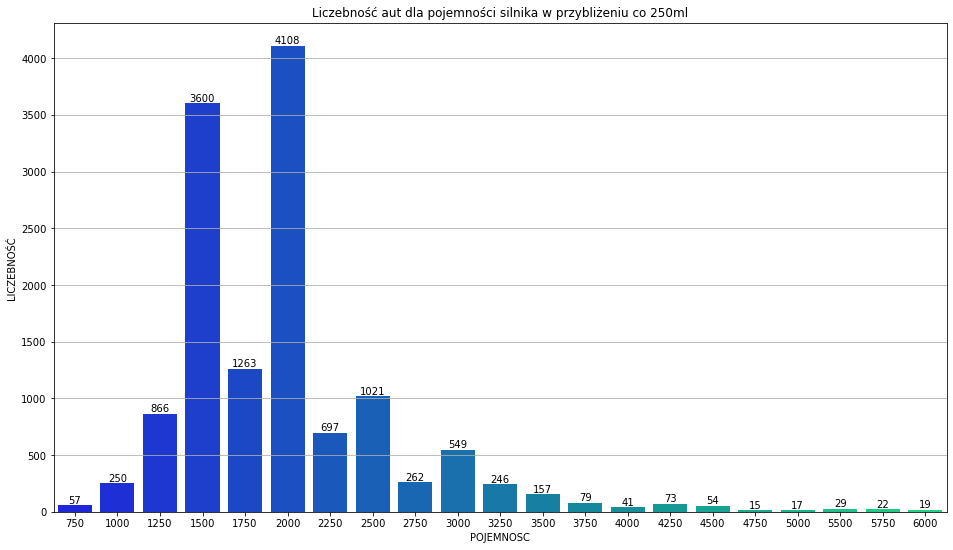

In [84]:
df_pom = df.copy()
df_pom['POJEMNOSC'] = (df_pom['POJEMNOSC'] // 250) * 250

df_count_pojemnosc = df_pom.groupby('POJEMNOSC').count()['MODEL_ID'].reset_index()
df_count_pojemnosc.rename(columns={'MODEL_ID': 'LICZEBNOŚĆ'}, inplace=True)


plt.figure(figsize=(16,9))
ax = sns.barplot(x='POJEMNOSC', y='LICZEBNOŚĆ', data=df_count_pojemnosc, palette='winter')
plt.grid(axis='y')
plt.title('Liczebność aut dla pojemności silnika w przybliżeniu co 250ml')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

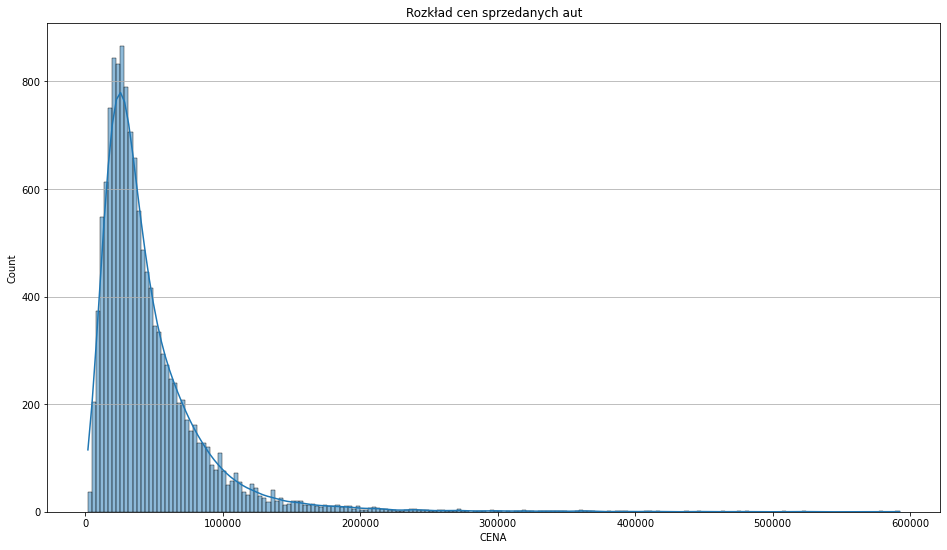

In [85]:
plt.figure(figsize=(16,9))
sns.histplot(data=df, x='CENA', kde=True)
plt.grid(axis='y')
plt.title('Rozkład cen sprzedanych aut')
plt.show()

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [88]:
X = df[['NADW', 'MARKA', 'POJEMNOSC', 'ROK_MIES']]
y = df['CENA']

X = pd.get_dummies(X, drop_first=True)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [90]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
y_pred = regr.predict(X_train)
print('R2:', r2_score(y_pred, y_train))
print('MSE:', np.sqrt(mean_squared_error(y_pred, y_train)))

R2: 0.9814851595184205
MSE: 5379.534192041463


In [92]:
y_pred = regr.predict(X_test)
print('R2:', r2_score(y_pred, y_test))
print('MSE:', np.sqrt(mean_squared_error(y_pred, y_test)))

R2: 0.9321227351599319
MSE: 10835.990060567772


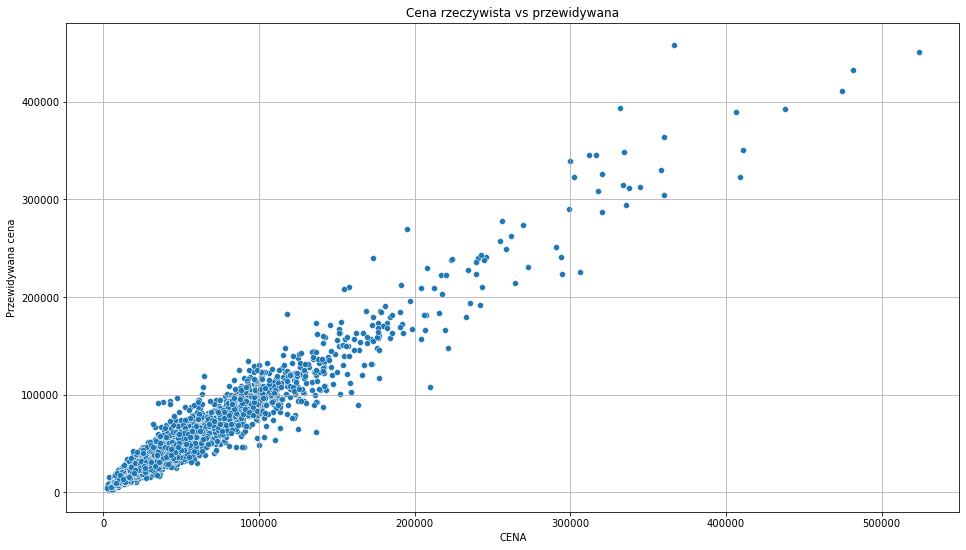

In [93]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=y_test, y=y_pred)
plt.ylabel('Przewidywana cena')
plt.grid()
plt.title('Cena rzeczywista vs przewidywana')

plt.show()

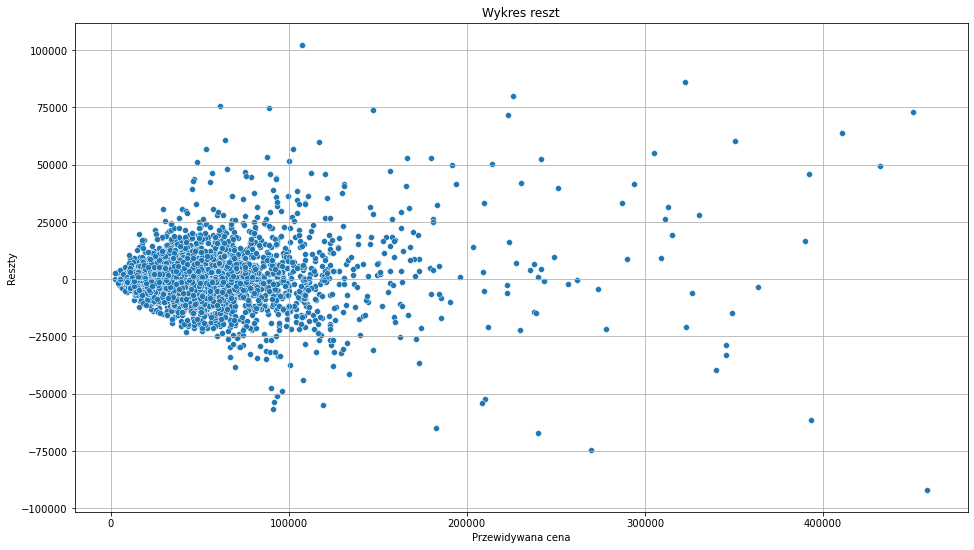

In [94]:
res = y_test - y_pred

plt.figure(figsize=(16,9))
sns.scatterplot(x=y_pred, y=res)
plt.xlabel('Przewidywana cena')
plt.ylabel('Reszty')
plt.grid()
plt.title('Wykres reszt')

plt.show()

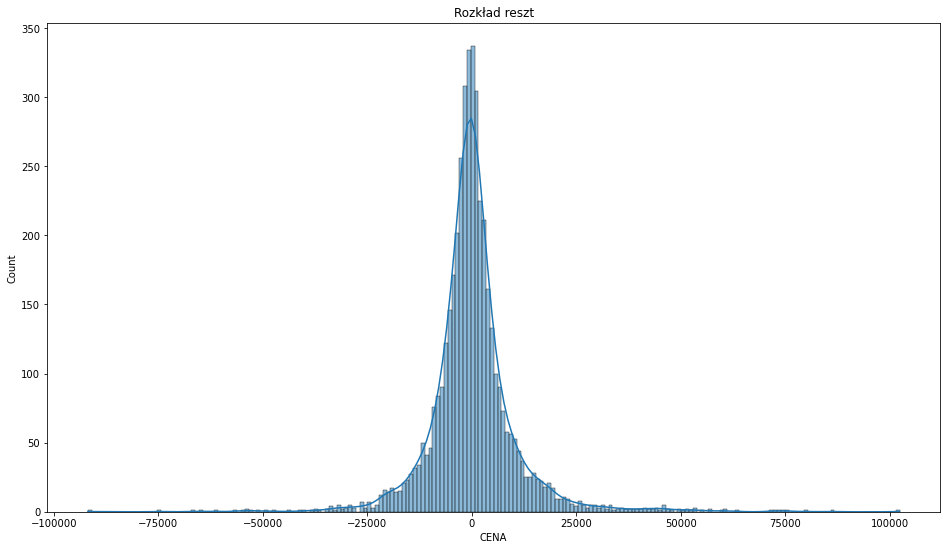

In [95]:
plt.figure(figsize=(16,9))
sns.histplot(res, kde=True)
plt.title('Rozkład reszt')
plt.show()

In [96]:
X2 = df[['NADW', 'MARKA', 'POJEMNOSC', 'ROK_MIES']]
y2 = np.log(df['CENA'])

X2 = pd.get_dummies(X2, drop_first=True)

In [97]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33)

In [98]:
regr2 = RandomForestRegressor()
regr2.fit(X_train2, y_train2)

RandomForestRegressor()

In [99]:
y_pred2 = regr2.predict(X_train2)
print('R2:', r2_score(y_pred2, y_train2))
print('MSE:', np.sqrt(mean_squared_error(y_pred2, y_train2)))

R2: 0.9760993339710203
MSE: 0.10862373697064144


In [100]:
y_pred2 = regr2.predict(X_test2)
print('R2:', r2_score(y_pred2, y_test2))
print('MSE:', np.sqrt(mean_squared_error(y_pred2, y_test2)))

R2: 0.9251786415419556
MSE: 0.19070774555061007


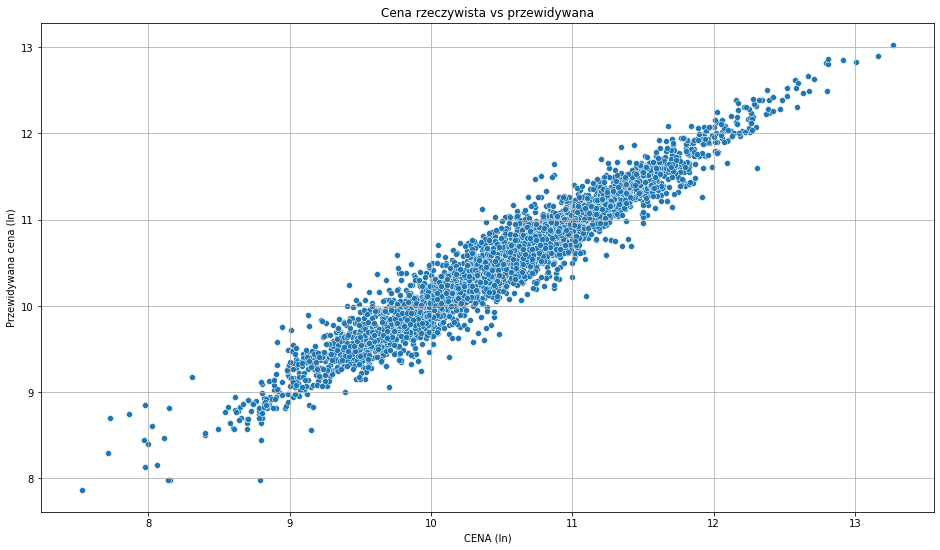

In [101]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=y_test2, y=y_pred2)
plt.ylabel('Przewidywana cena (ln)')
plt.xlabel('CENA (ln)')
plt.grid()
plt.title('Cena rzeczywista vs przewidywana')

plt.show()

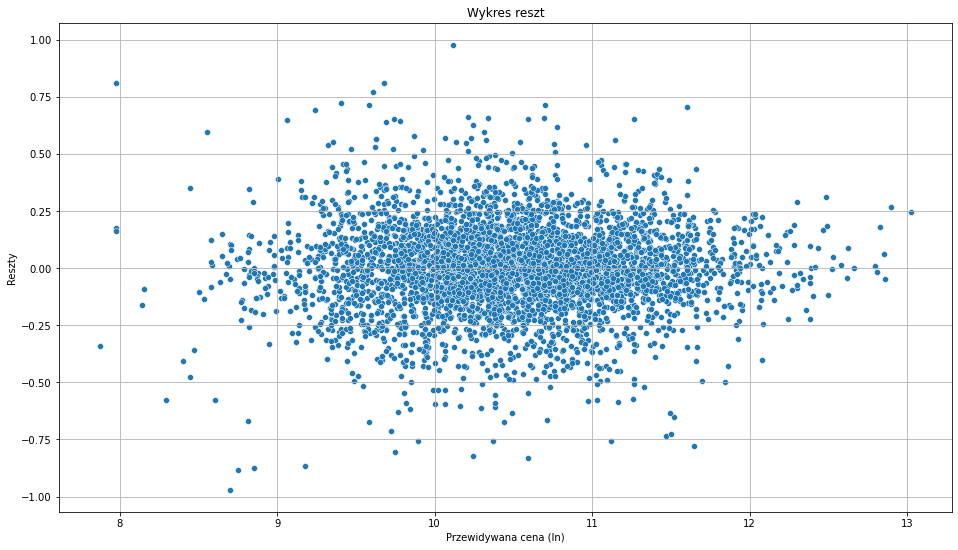

In [102]:
res2 = y_test2 - y_pred2

plt.figure(figsize=(16,9))
sns.scatterplot(x=y_pred2, y=res2)
plt.xlabel('Przewidywana cena (ln)')
plt.ylabel('Reszty')
plt.grid()
plt.title('Wykres reszt')

plt.show()

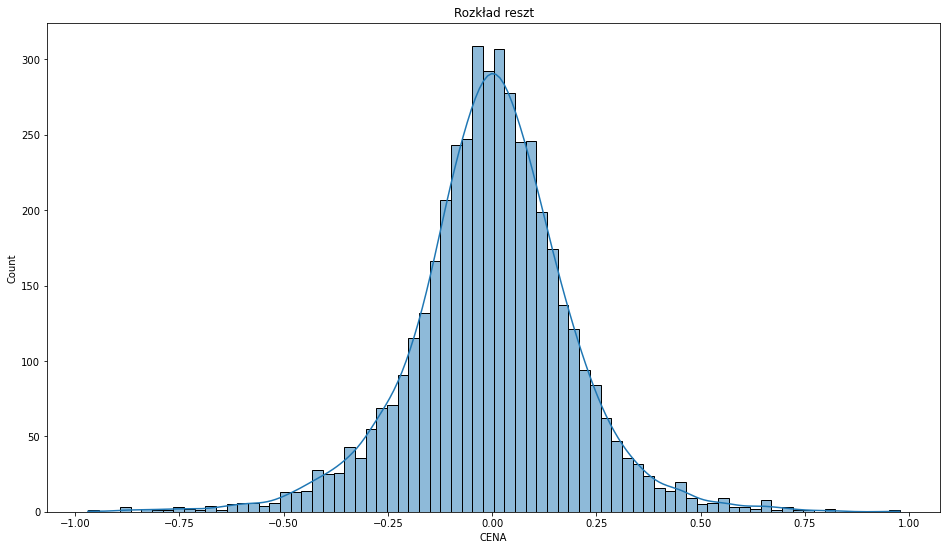

In [103]:
plt.figure(figsize=(16,9))
sns.histplot(res2, kde=True)
plt.title('Rozkład reszt')
plt.show()

In [105]:
df_test = df.loc[X_test.index]
df_test['Przewidziana cena'] = y_pred
df_test['Roznica'] = df_test['CENA'] - df_test['Przewidziana cena']

In [106]:
df_test

,MODEL_ID,NADW,MARKA,NADWOZIE,POJEMNOSC,ROK_MIES,CENA,Przewidziana cena,Roznica
12926,108198,kb,CITROËN,kombi,2055,2002,11676.0,11633.879286,42.120714
9392,149784,hb,OPEL,hatchback,1379,2007,27609.0,37990.599286,-10381.599286
12949,141848,kb,VOLVO,kombi,2551,2004,56850.0,46901.808000,9948.192000
5890,172650,hb,SEAT,hatchback,2118,2010,87759.0,81415.762500,6343.237500
4773,196216,m.van,TOYOTA,minivan,1944,2008,68250.0,65478.975000,2771.025000
...,...,...,...,...,...,...,...,...,...
13162,188518,kb,VOLVO,kombi,3103,2011,161073.0,145786.937000,15286.063000
13955,70772,cp,PORSCHE,coupe,3750,2000,239586.0,235407.865714,4178.134286
5233,52164,hb,SEAT,hatchback,1149,2003,16326.0,15439.977288,886.022712
11941,182072,kb,BMW,kombi,3143,2009,167400.0,129953.767500,37446.232500


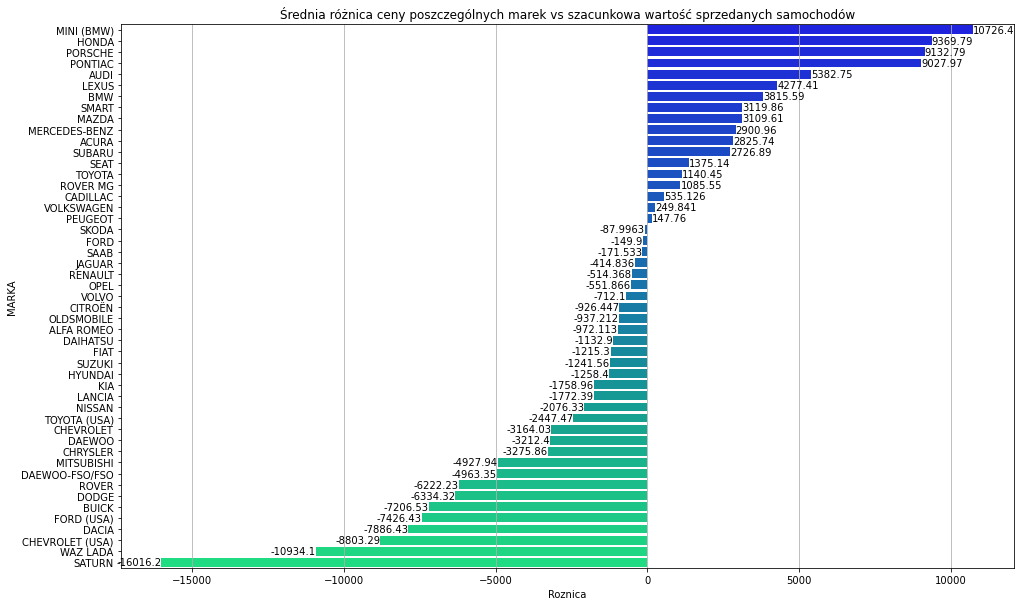

In [108]:
df_roznica_marka = df_test.groupby('MARKA').mean()['Roznica'].reset_index().sort_values('Roznica', ascending=False)


plt.figure(figsize=(16,10))
ax = sns.barplot(x='Roznica', y='MARKA', data=df_roznica_marka, palette='winter')
plt.grid(axis='x')
plt.title('Średnia różnica ceny poszczególnych marek vs szacunkowa wartość sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

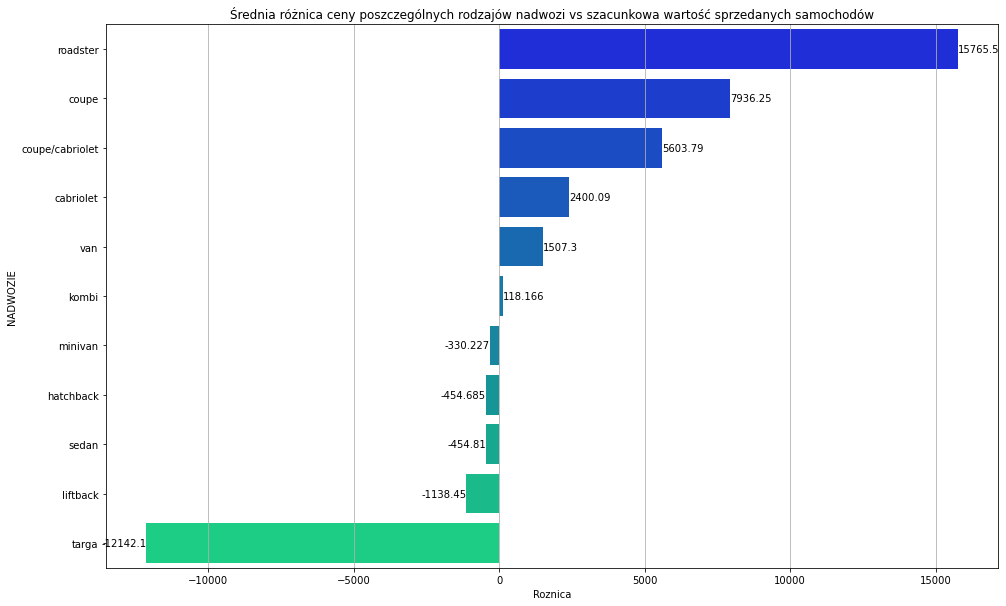

In [109]:
df_roznica_nadwozie = df_test.groupby('NADWOZIE').mean()['Roznica'].reset_index().sort_values('Roznica', ascending=False)


plt.figure(figsize=(16,10))
ax = sns.barplot(x='Roznica', y='NADWOZIE', data=df_roznica_nadwozie, palette='winter')
plt.grid(axis='x')
plt.title('Średnia różnica ceny poszczególnych rodzajów nadwozi vs szacunkowa wartość sprzedanych samochodów')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

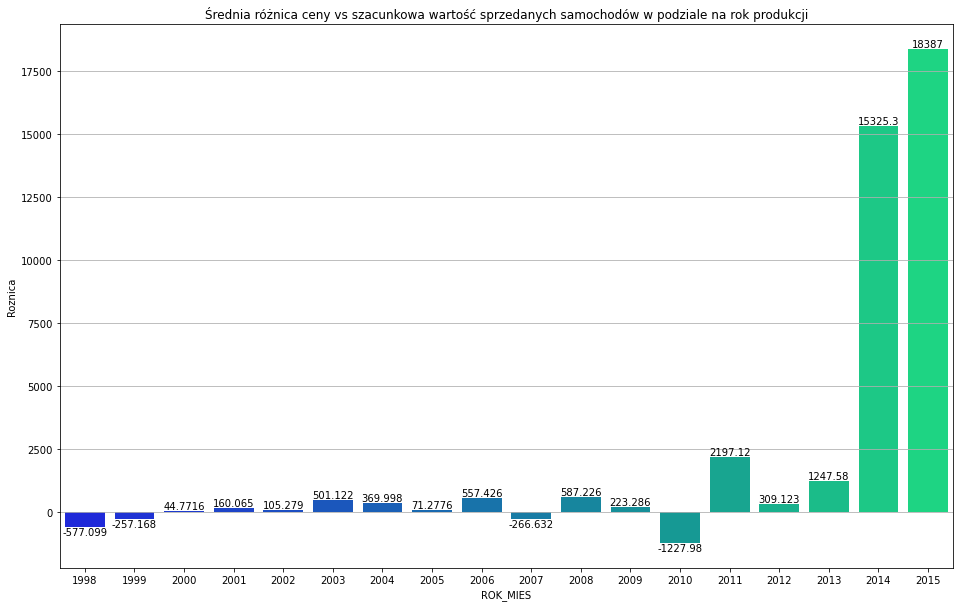

In [110]:
df_roznica_nadwozie = df_test.groupby('ROK_MIES').mean()['Roznica'].reset_index()


plt.figure(figsize=(16,10))
ax = sns.barplot(x='ROK_MIES', y='Roznica', data=df_roznica_nadwozie, palette='winter')
plt.grid(axis='y')
plt.title('Średnia różnica ceny vs szacunkowa wartość sprzedanych samochodów w podziale na rok produkcji')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

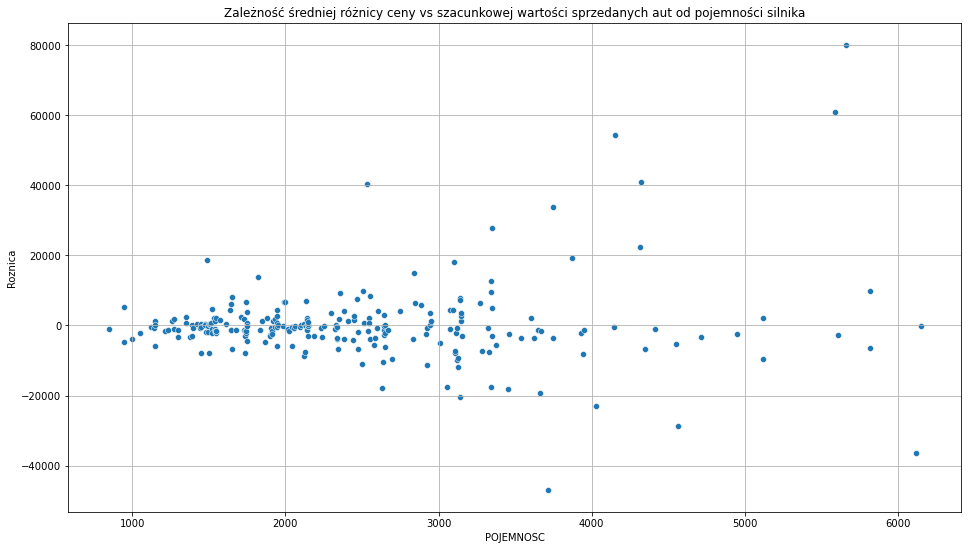

In [112]:
df_roznica_pojemnosc = df_test.groupby('POJEMNOSC').mean()['Roznica'].reset_index()


plt.figure(figsize=(16,9))
ax = sns.scatterplot(x='POJEMNOSC', y='Roznica', data=df_roznica_pojemnosc)
plt.grid()
plt.title('Zależność średniej różnicy ceny vs szacunkowej wartości sprzedanych aut od pojemności silnika')
plt.show()

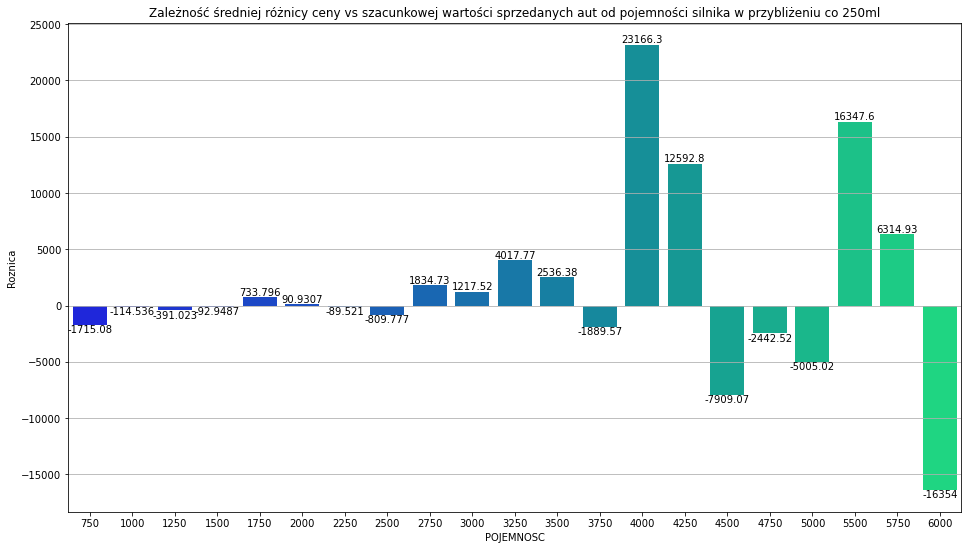

In [113]:
df_pom = df_test.copy()
df_pom['POJEMNOSC'] = (df_pom['POJEMNOSC'] // 250) * 250

df_roznica_pojemnosc = df_pom.groupby('POJEMNOSC').mean()['Roznica'].reset_index()


plt.figure(figsize=(16,9))
ax = sns.barplot(x='POJEMNOSC', y='Roznica', data=df_roznica_pojemnosc, palette='winter')
plt.grid(axis='y')
plt.title('Zależność średniej różnicy ceny vs szacunkowej wartości sprzedanych aut od pojemności silnika w przybliżeniu co 250ml')

for i in ax.containers:
    ax.bar_label(i,)
plt.show()